In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [3]:
path_burglaries_in_years = 'Data/Burglaries'
all_files = glob.glob(os.path.join(path_burglaries_in_years, "*.xlsx"))
burglaries_dict = {}
i=2011
for filename in all_files:
    burglaries_dict[i] = pd.read_excel(filename)
    i+=1

burglaries_dict[2020]['Amount of burglaries']
# crime = pd.concat((pd.read_excel(f) for f in all_files), ignore_index=True)

0      16
1      23
2      25
3      13
4      26
       ..
202     4
203     8
204     5
205     3
206     8
Name: Amount of burglaries, Length: 207, dtype: int64

In [4]:
fractions = pd.read_excel('Data/fractions.xlsx')
matching_columns = fractions.columns[fractions.columns.str.contains('fraction')]
fractions_new = fractions[matching_columns]
fractions_new["LSOA"] = fractions['LSOA']

scaler = RobustScaler()

# Remove the categorical column
numerical_data = fractions_new.drop('LSOA', axis=1)

# Scale the numerical columns
normalized_data = scaler.fit_transform(numerical_data)
final_normalized = pd.DataFrame(normalized_data, columns=numerical_data.columns)

# Re-add the categorical column
final_normalized['LSOA'] = fractions_new['LSOA']
final_normalized

C:\Users\royva\AppData\Local\Temp\ipykernel_14892\2755305693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fractions_new["LSOA"] = fractions['LSOA']


,parking_fraction,gym_fraction,hotel_fraction,church_fraction,train_fraction,homeless shelter_fraction,restaurant_fraction,post_fraction,bar_fraction,lsoa_fraction,...,park_fraction,shopping mall_fraction,police_fraction,museum_fraction,bus_fraction,hospital_fraction,university_fraction,cafe_fraction,soccer field_fraction,LSOA
0,0.00,0.000000,0.08,0.000000,0.00,0.0,-0.2,0.00,0.00,0.0,...,1.875,0.00,0.0,0.0,0.538462,0.00,0.00,0.636364,0.0,E01000188
1,0.13,0.000000,0.00,1.529412,0.00,0.0,0.9,0.00,0.03,0.0,...,0.000,0.00,0.0,0.0,0.076923,0.00,0.00,0.818182,0.0,E01000194
2,0.03,0.857143,0.03,0.352941,0.06,0.0,0.1,0.03,0.00,0.0,...,0.000,0.03,0.0,0.0,-0.192308,0.00,0.00,1.636364,0.0,E01000193
3,0.02,0.000000,0.02,0.000000,0.00,0.0,1.4,0.04,0.00,0.0,...,0.000,0.00,0.0,0.0,-0.192308,0.00,0.00,0.909091,0.0,E01000192
4,0.21,2.000000,0.00,1.647059,0.00,0.0,0.5,0.00,0.00,0.0,...,0.875,0.00,0.0,0.0,-0.884615,0.13,0.00,0.000000,0.0,E01000125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.00,0.000000,0.00,0.823529,0.00,0.0,-0.2,0.00,0.07,0.0,...,0.875,0.00,0.0,0.0,1.346154,0.00,0.00,0.000000,0.0,E01000118
203,0.17,0.000000,0.00,3.764706,0.00,0.0,-0.2,0.00,0.00,0.0,...,0.000,0.00,0.0,0.0,-0.307692,0.00,0.00,0.000000,0.0,E01000119
204,0.00,0.000000,0.00,0.000000,0.00,0.0,-0.2,0.00,0.00,0.0,...,5.875,0.00,0.0,0.0,-0.076923,0.00,0.00,0.000000,0.0,E01000121
205,0.00,0.000000,0.20,0.000000,0.00,0.0,-0.2,0.00,0.00,0.0,...,0.000,0.00,0.0,0.0,-0.230769,0.00,0.00,0.000000,0.0,E01000115


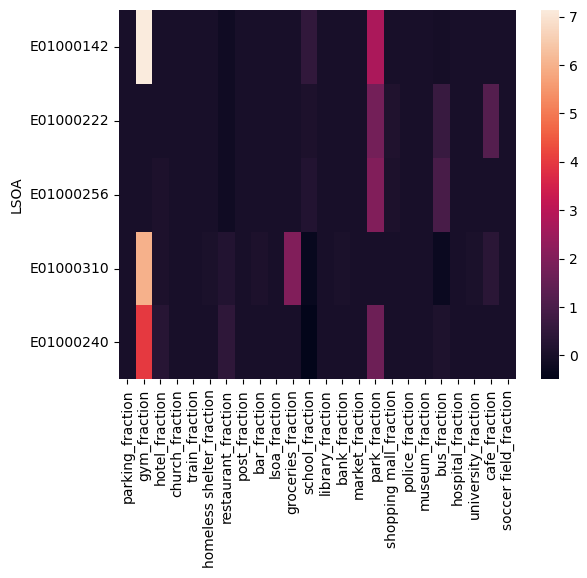

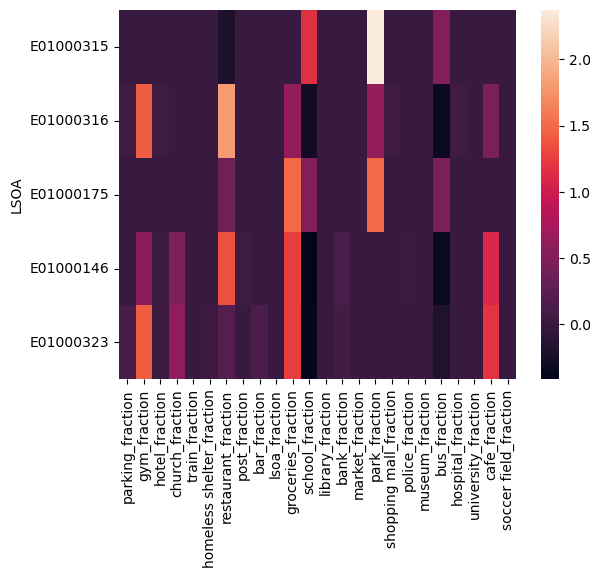

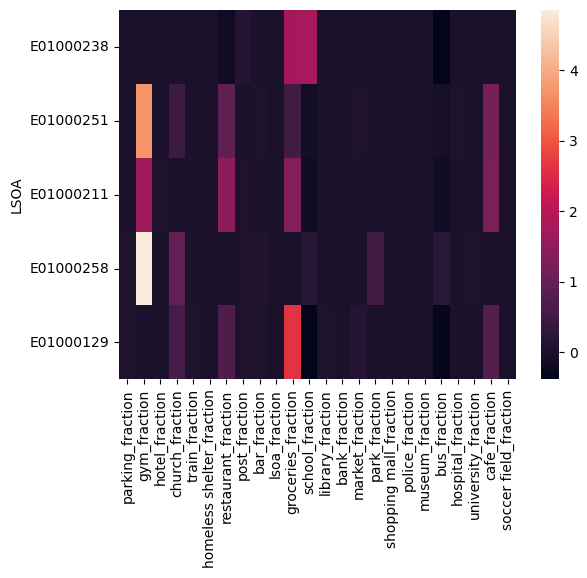

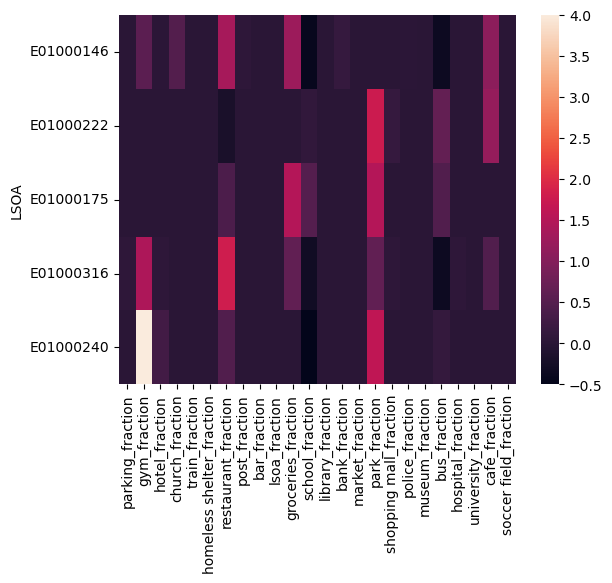

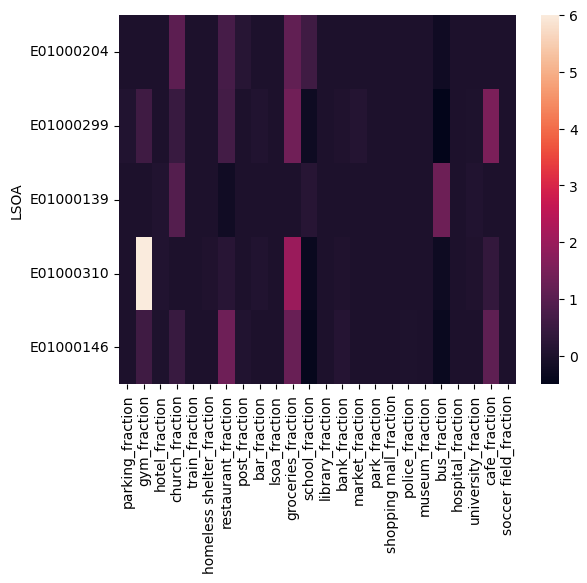

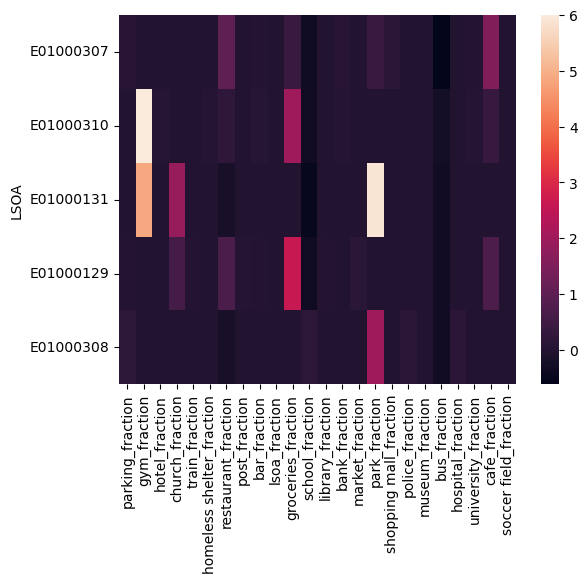

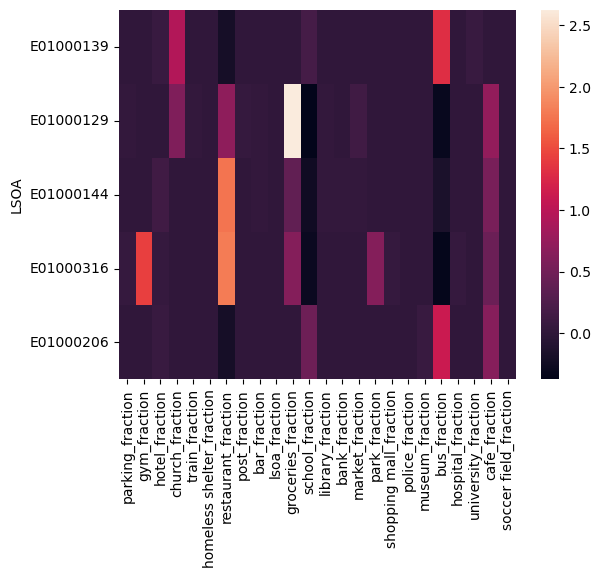

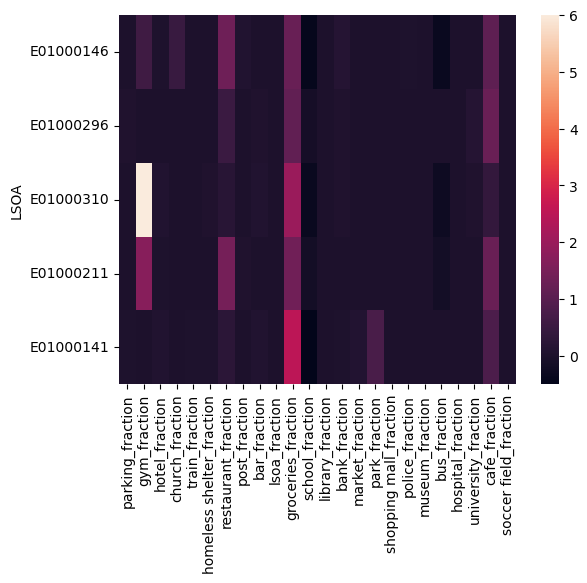

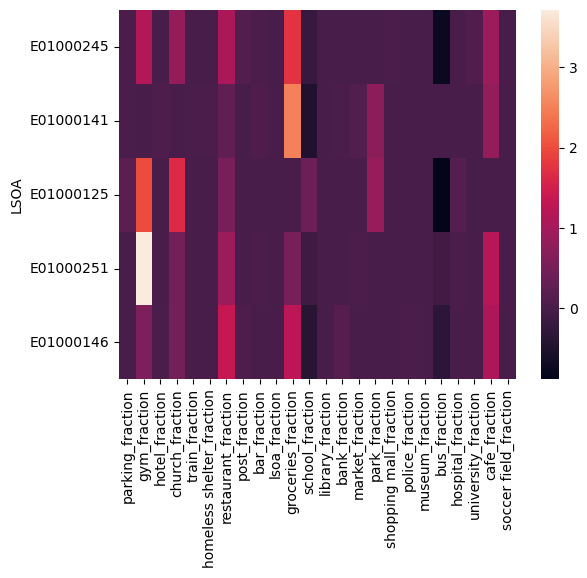

In [5]:
final_list = []

for x in [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:
    sorted_df = burglaries_dict[x].sort_values('Amount of burglaries', ascending=False)[0:5]
    final = pd.merge(sorted_df['LSOA'], final_normalized, on='LSOA')
    final = final.set_index('LSOA')
#     print(final.mean())
    final_list.append(final.mean())
    sns.heatmap(final)
    plt.show()

<AxesSubplot: >

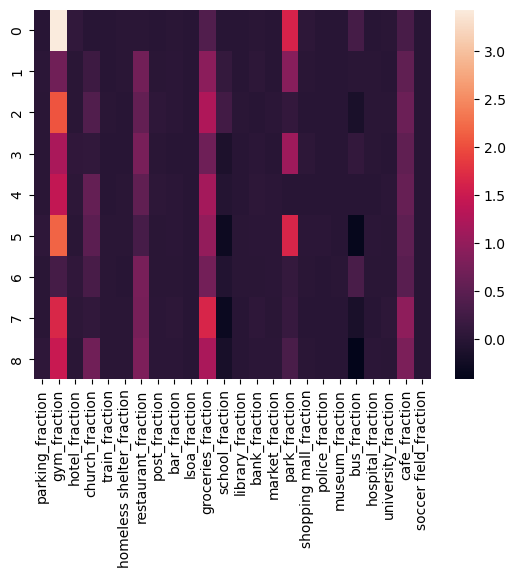

In [6]:
heatmap_df = pd.DataFrame(data=final_list)
sns.heatmap(heatmap_df)

In [8]:
heatmap_df.mean()     

parking_fraction             0.024000
gym_fraction                 1.600000
hotel_fraction               0.039778
church_fraction              0.318954
train_fraction               0.003333
homeless shelter_fraction    0.005556
restaurant_fraction          0.580000
post_fraction                0.022667
bar_fraction                 0.023333
lsoa_fraction                0.000000
groceries_fraction           0.997222
school_fraction             -0.070370
library_fraction             0.002667
bank_fraction                0.027111
market_fraction              0.017556
park_fraction                0.663889
shopping mall_fraction       0.015111
police_fraction              0.005556
museum_fraction              0.001778
bus_fraction                -0.040171
hospital_fraction            0.011333
university_fraction          0.013778
cafe_fraction                0.600000
soccer field_fraction        0.000000
dtype: float64